In [1]:
from keras.applications.vgg16 import VGG16
import os
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from keras import optimizers
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [3]:
os.chdir('C:\\Users\\Utkarsh\\Desktop\\ML-workspace\\DDD')

In [4]:
import csv
data = {}
with open('driver_imgs_list.csv') as f:
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    key = row[1]
    if key in data:
      data[key].append(row[2])
    else:
      data[key] = [row[2]]

In [5]:
expressions_list = set(list(data.keys()))

In [38]:
height_shift_range = 0.02
shear_range = 0.01
zoom_range = 0.05
horizontal_flip = False
fill_mode = "nearest"

def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def change_contrast(img, level):
    img = Image.fromarray(img.astype('uint8'))
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return np.array(img.point(contrast))

def pad_img(img):
    h, w = img.shape[:2]
    new_h = int((5 + secrets.randbelow(16)) * h / 100) + h
    new_w = int((5 + secrets.randbelow(16)) * w / 100) + w

    full_sheet = np.ones((new_h, new_w, 3)) * 255

    p_X = secrets.randbelow(new_h - img.shape[0])
    p_Y = secrets.randbelow(new_w - img.shape[1])

    full_sheet[p_X : p_X + img.shape[0], p_Y : p_Y + img.shape[1]] = img

    full_sheet = cv2.resize(full_sheet, (w, h), interpolation = cv2.INTER_AREA)

    return full_sheet.astype(np.uint8)

def preprocess_img(img):
    img = np.array(img)

    x = secrets.randbelow(2)

    if x == 0:
        # img = pad_img(img)
        img = increase_brightness(img, secrets.randbelow(26))
        img = change_contrast(img, secrets.randbelow(51))
    else:
        # img = pad_img(img)
        img = change_contrast(img, secrets.randbelow(51))
        img = increase_brightness(img, secrets.randbelow(26))

    return img

In [39]:
gen_per_image = 1
gen_per_class = 200
rotation_range = 5
width_shift_range = 0.02
height_shift_range = 0.02
shear_range = 0.01
zoom_range = 0.05
horizontal_flip = False
fill_mode = "nearest"

In [42]:
BATCH_SIZE = 128
IMAGE_SIZE = 224
NUM_EPOCH = 400

In [43]:


TRAIN_DIR = r'C:\Users\Utkarsh\Desktop\ML-workspace\DDD\output\train'
test_dir = r'C:\Users\Utkarsh\Desktop\ML-workspace\DDD\output\test'
VALID_DIR = r'C:\Users\Utkarsh\Desktop\ML-workspace\DDD\output\val'

datagen = ImageDataGenerator(
        rotation_range = rotation_range,
        width_shift_range = width_shift_range,
        height_shift_range = height_shift_range,
        shear_range = shear_range,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip,
        fill_mode = fill_mode,
        validation_split = 0.2,
        preprocessing_function = preprocess_img)


train_data = datagen.flow_from_directory(TRAIN_DIR,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        subset='training',shuffle=False)

valid_data = datagen.flow_from_directory(VALID_DIR,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        subset='validation',shuffle=False)

Found 11177 images belonging to 10 classes.
Found 346 images belonging to 10 classes.


In [55]:
print("Train shape",train_vgg16.shape)
print("Validation shape",valid_vgg16.shape)

Train shape (11177, 7, 7, 512)
Validation shape (346, 7, 7, 512)


In [56]:

train_features = train_vgg16[0]
valid_features = valid_vgg16[0]

In [57]:
print("Train features shape",train_features.shape)
print("Validation features shape",valid_features.shape)

Train features shape (7, 7, 512)
Validation features shape (7, 7, 512)


In [51]:
train_features = train_vgg16[0]
valid_features = valid_vgg16[0]

In [58]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_features.shape))
VGG16_model.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))

VGG16_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 5130 (20.04 KB)
Trainable params: 5130 (20.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
from tensorflow.keras.callbacks import EarlyStopping


VGG16_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [63]:
model_history = VGG16_model.fit(train_vgg16,train_data.classes,validation_data = (valid_vgg16,valid_data.classes),epochs=400,shuffle=True)


Epoch 1/400
350/350 [==============================] - 3s 6ms/step - loss: 2.6123 - accuracy: 0.4022 - val_loss: 1.6302 - val_accuracy: 0.5520
Epoch 2/400
350/350 [==============================] - 2s 5ms/step - loss: 0.8410 - accuracy: 0.7325 - val_loss: 0.6910 - val_accuracy: 0.7861
Epoch 3/400
350/350 [==============================] - 2s 5ms/step - loss: 0.5080 - accuracy: 0.8366 - val_loss: 0.9282 - val_accuracy: 0.7225
Epoch 4/400
350/350 [==============================] - 2s 5ms/step - loss: 0.3723 - accuracy: 0.8791 - val_loss: 0.5495 - val_accuracy: 0.8353
Epoch 5/400
350/350 [==============================] - 2s 5ms/step - loss: 0.3015 - accuracy: 0.9042 - val_loss: 0.6447 - val_accuracy: 0.7977
Epoch 6/400
350/350 [==============================] - 2s 5ms/step - loss: 0.2563 - accuracy: 0.9189 - val_loss: 0.3664 - val_accuracy: 0.8642
Epoch 7/400
350/350 [==============================] - 2s 5ms/step - loss: 0.2241 - accuracy: 0.9305 - val_loss: 0.3567 - val_accuracy: 0.8642

Epoch 58/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.3236 - val_accuracy: 0.9277
Epoch 59/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.2453 - val_accuracy: 0.9306
Epoch 60/400
350/350 [==============================] - 2s 5ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.3422 - val_accuracy: 0.9191
Epoch 61/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.3711 - val_accuracy: 0.9162
Epoch 62/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.2366 - val_accuracy: 0.9422
Epoch 63/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0253 - accuracy: 0.9928 - val_loss: 0.2199 - val_accuracy: 0.9393
Epoch 64/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0253 - accuracy: 0.9930 - val_loss: 0.2167 - val_accuracy:

Epoch 115/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.3563 - val_accuracy: 0.9277
Epoch 116/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.2690 - val_accuracy: 0.9393
Epoch 117/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.3269 - val_accuracy: 0.9133
Epoch 118/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.3656 - val_accuracy: 0.9249
Epoch 119/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0085 - accuracy: 0.9978 - val_loss: 0.4369 - val_accuracy: 0.9191
Epoch 120/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.4012 - val_accuracy: 0.9191
Epoch 121/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.4219 - val_ac

350/350 [==============================] - 2s 4ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.5086 - val_accuracy: 0.9075
Epoch 228/400
350/350 [==============================] - 2s 4ms/step - loss: 9.9756e-04 - accuracy: 0.9999 - val_loss: 0.4607 - val_accuracy: 0.9133
Epoch 229/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.5132 - val_accuracy: 0.9133
Epoch 230/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.4490 - val_accuracy: 0.9191
Epoch 231/400
350/350 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.4534 - val_accuracy: 0.9191
Epoch 232/400
350/350 [==============================] - 2s 4ms/step - loss: 9.9577e-04 - accuracy: 0.9997 - val_loss: 0.4680 - val_accuracy: 0.9220
Epoch 233/400
350/350 [==============================] - 2s 4ms/step - loss: 9.3457e-04 - accuracy: 0.9999 - val_loss: 0.4927 - val_accu

350/350 [==============================] - 2s 4ms/step - loss: 6.8415e-05 - accuracy: 1.0000 - val_loss: 0.5631 - val_accuracy: 0.9104
Epoch 338/400
350/350 [==============================] - 2s 5ms/step - loss: 5.5284e-05 - accuracy: 1.0000 - val_loss: 0.5990 - val_accuracy: 0.9104
Epoch 339/400
350/350 [==============================] - 2s 5ms/step - loss: 8.1152e-05 - accuracy: 1.0000 - val_loss: 0.5753 - val_accuracy: 0.9133
Epoch 340/400
350/350 [==============================] - 2s 4ms/step - loss: 7.4796e-05 - accuracy: 1.0000 - val_loss: 0.5505 - val_accuracy: 0.9133
Epoch 341/400
350/350 [==============================] - 2s 4ms/step - loss: 4.9644e-05 - accuracy: 1.0000 - val_loss: 0.5415 - val_accuracy: 0.9162
Epoch 342/400
350/350 [==============================] - 2s 4ms/step - loss: 5.2592e-05 - accuracy: 1.0000 - val_loss: 0.5517 - val_accuracy: 0.9075
Epoch 343/400
350/350 [==============================] - 2s 4ms/step - loss: 4.4150e-05 - accuracy: 1.0000 - val_loss: 0

350/350 [==============================] - 2s 4ms/step - loss: 1.9272e-05 - accuracy: 1.0000 - val_loss: 0.5508 - val_accuracy: 0.9133
Epoch 393/400
350/350 [==============================] - 2s 4ms/step - loss: 1.9101e-05 - accuracy: 1.0000 - val_loss: 0.6098 - val_accuracy: 0.9075
Epoch 394/400
350/350 [==============================] - 2s 4ms/step - loss: 1.8165e-05 - accuracy: 1.0000 - val_loss: 0.5460 - val_accuracy: 0.9133
Epoch 395/400
350/350 [==============================] - 2s 4ms/step - loss: 1.8134e-05 - accuracy: 1.0000 - val_loss: 0.5889 - val_accuracy: 0.9133
Epoch 396/400
350/350 [==============================] - 2s 4ms/step - loss: 1.8731e-05 - accuracy: 1.0000 - val_loss: 0.5669 - val_accuracy: 0.9104
Epoch 397/400
350/350 [==============================] - 2s 4ms/step - loss: 1.8848e-05 - accuracy: 1.0000 - val_loss: 0.5817 - val_accuracy: 0.9133
Epoch 398/400
350/350 [==============================] - 2s 4ms/step - loss: 1.8601e-05 - accuracy: 1.0000 - val_loss: 0

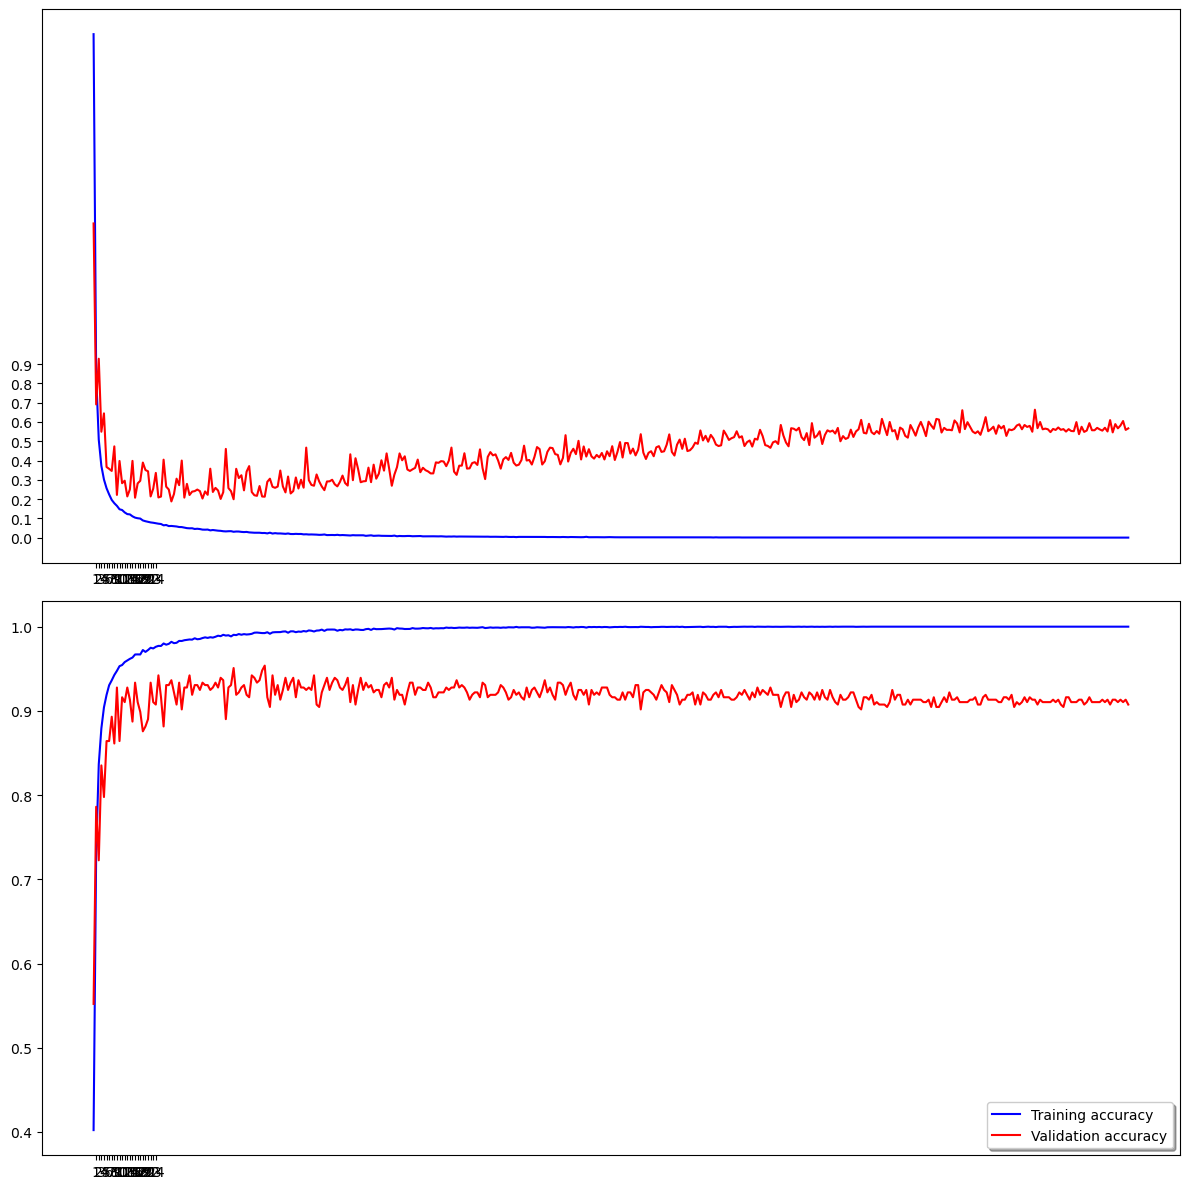

In [64]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model_history.history['loss'], color='b', label="Training loss")
ax1.plot(model_history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model_history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model_history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [81]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [82]:
def print_heatmap(n_labels, n_predictions, class_names):
    labels = n_labels 
    predictions = n_predictions

    matrix = confusion_matrix(labels,predictions.argmax(axis=1))
    row_sum = np.sum(matrix, axis = 1)
    w, h = matrix.shape

    c_m = np.zeros((w, h))

    for i in range(h):
        c_m[i] = matrix[i] * 100 / row_sum[i]

    c = c_m.astype(dtype = np.uint8)

    
#     heatmap = print_confusion_matrix(c, class_names, figsize=(18,10), fontsize=20)

In [83]:
ypred = VGG16_model.predict(valid_vgg16)

valid_list = valid_data.classes.tolist()

ypred_class = np.argmax(ypred,axis=1)
ytest = valid_list

11/11 [==============================] - 0s 4ms/step


In [84]:
class_names = list()
for name,idx in valid_data.class_indices.items():
    class_names.append(name)
print(class_names)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


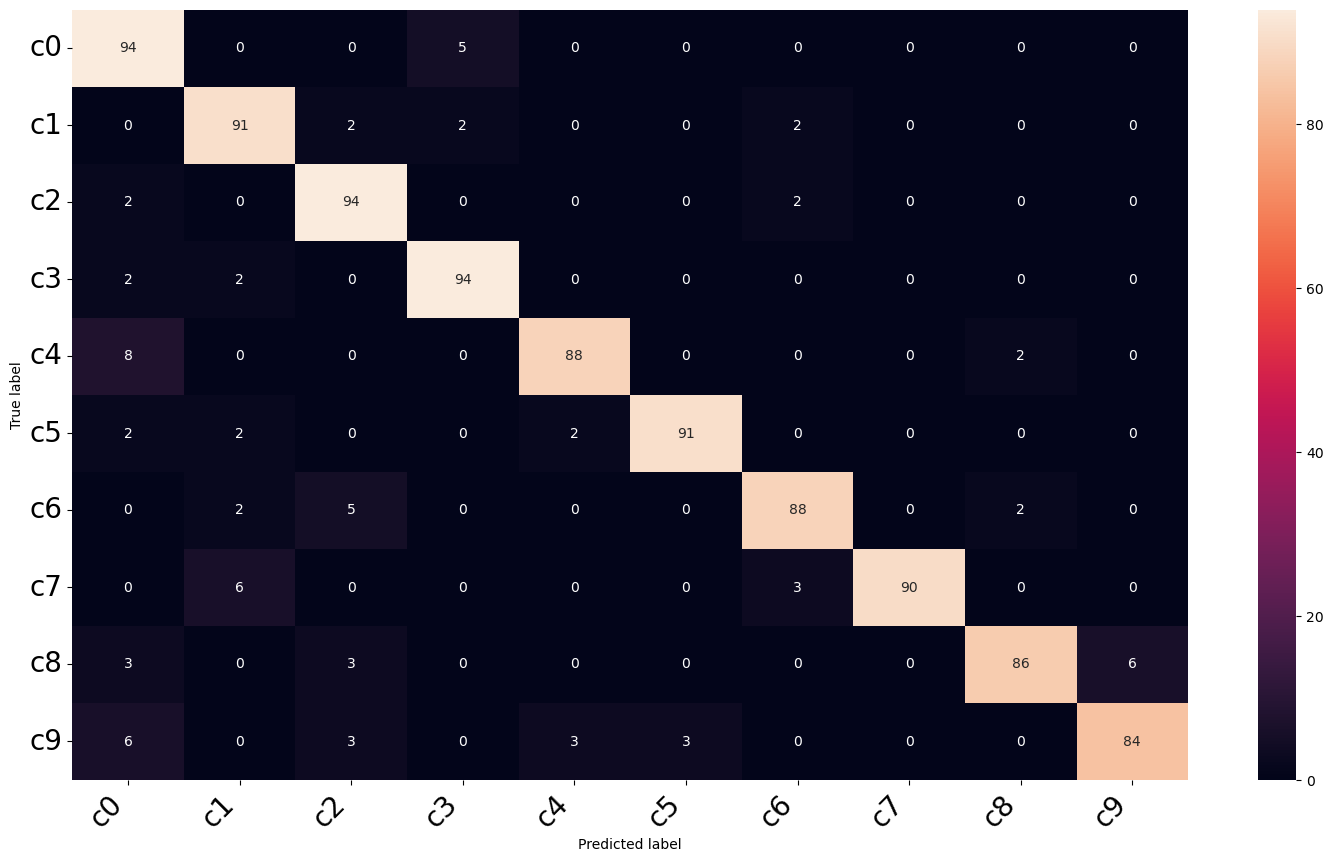

In [86]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
print_heatmap(ytest,ypred,class_names)


In [87]:
accuracy = accuracy_score(ytest,ypred_class)
print('Accuracy: %f' % accuracy)

precision = precision_score(ytest, ypred_class,average='weighted')
print('Precision: %f' % precision)

recall = recall_score(ytest,ypred_class,average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(ytest,ypred_class,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.907514
Precision: 0.911880
Recall: 0.907514
F1 score: 0.908095
